# Churn prediction of customers

In [116]:
import numpy as np
import pandas as pd   #importing numpy and pandas

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt #importing visualisation tools-> seaborn and matplotlib

In [118]:
sns.set_theme() #for formatting the apperance of plots

In [119]:
#churn_samp=pd.read_csv('train_PDjVQMB.csv')  #reading the train file

In [120]:
churn=pd.read_csv('train_PDjVQMB.csv') #reading the train file

In [121]:
churn.head(10)   #printing the first 10 value in the training file

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1
5,e7a8332a,31,Female,Less than 5L,111026.79,4,1,1,0,Good,0
6,f2de1836,56,Male,Less than 5L,1072102.23,2,1,2,1,Average,0
7,f422388a,41,Female,10L - 15L,1587489.75,4,0,1,1,Poor,1
8,773aa149,60,Female,10L - 15L,1465812.54,0,0,1,1,Poor,1
9,443be80f,32,Female,5L - 10L,770796.81,3,0,1,1,Poor,0


In [122]:
churn.info()  #to get info on the training file such as the data type,count,memory usage etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  6650 non-null   object 
 1   Age                 6650 non-null   int64  
 2   Gender              6650 non-null   object 
 3   Income              6650 non-null   object 
 4   Balance             6650 non-null   float64
 5   Vintage             6650 non-null   int64  
 6   Transaction_Status  6650 non-null   int64  
 7   Product_Holdings    6650 non-null   object 
 8   Credit_Card         6650 non-null   int64  
 9   Credit_Category     6650 non-null   object 
 10  Is_Churn            6650 non-null   int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 571.6+ KB


In [123]:
churn.isnull().sum()  # to check for null values,if any present in our data

ID                    0
Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
Is_Churn              0
dtype: int64

<AxesSubplot:>

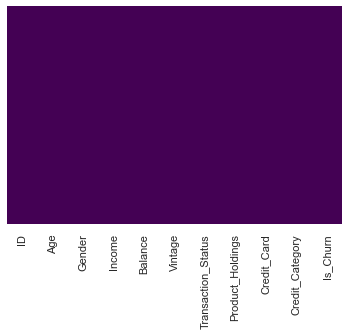

In [124]:
sns.heatmap(churn.isnull(),yticklabels=False,cbar=False,cmap='viridis') #graphical checking of presence of null values
#if null values are present,it will be highlighted in the below graph

<AxesSubplot:>

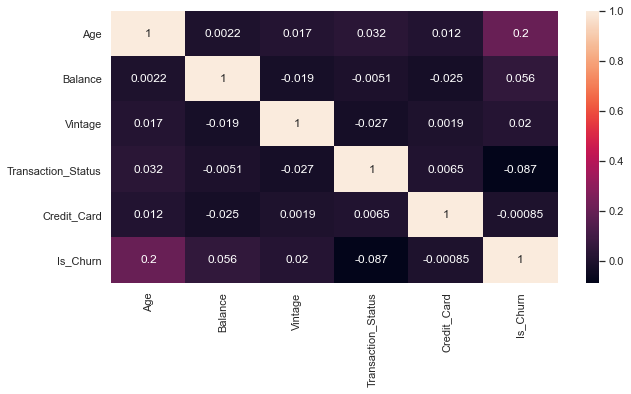

In [125]:
plt.figure(figsize=(10,5))
sns.heatmap(churn.corr(),annot=True)  # to plot the correlation and their coefficients between all the variables in our data

In [126]:
print(churn['Gender'].unique())
print(churn['Income'].unique())
print(churn['Product_Holdings'].unique())  #this is done to get the unique values in all these 4 categorical columns 
print(churn['Credit_Category'].unique())    #as these are non numerical.

['Female' 'Male']
['5L - 10L' 'Less than 5L' 'More than 15L' '10L - 15L']
['1' '2' '3+']
['Average' 'Poor' 'Good']


In [127]:
Gender=pd.get_dummies(churn['Gender'],drop_first=True)
Income=pd.get_dummies(churn['Income'],drop_first=True)
Product_Holdings=pd.get_dummies(churn['Product_Holdings'],drop_first=True)  #converting these categorical columns into numerical 
Credit_Category=pd.get_dummies(churn['Credit_Category'],drop_first=True)    #by using pandas get dummies method.

In [128]:
churn=pd.concat([churn,Gender,Income,Product_Holdings,Credit_Category],axis=1) #concatenating the newly created dummies to our data frame.
churn.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Is_Churn,Male,5L - 10L,Less than 5L,More than 15L,2,3+,Good,Poor
0,84e2fcc9,36,Female,5L - 10L,563266.44,4,0,1,0,Average,1,0,1,0,0,0,0,0,0
1,57fea15e,53,Female,Less than 5L,875572.11,2,1,1,1,Poor,0,0,0,1,0,0,0,0,1
2,8df34ef3,35,Female,More than 15L,701607.06,2,1,2,0,Poor,0,0,0,0,1,1,0,0,1
3,c5c0788b,43,Female,More than 15L,1393922.16,0,1,2,1,Poor,1,0,0,0,1,1,0,0,1
4,951d69c4,39,Female,More than 15L,893146.23,1,1,1,1,Good,1,0,0,0,1,0,0,1,0


In [129]:
churn.drop(['Gender','Income','Product_Holdings','Credit_Category'],axis=1,inplace=True)
#since the dummies are already created,we can safely remove the categorical columns 

In [130]:
churn.info()  #checking the data after creation of dummies.All the variables are now in numerical format(except ID which is not needed for analysis)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6650 entries, 0 to 6649
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  6650 non-null   object 
 1   Age                 6650 non-null   int64  
 2   Balance             6650 non-null   float64
 3   Vintage             6650 non-null   int64  
 4   Transaction_Status  6650 non-null   int64  
 5   Credit_Card         6650 non-null   int64  
 6   Is_Churn            6650 non-null   int64  
 7   Male                6650 non-null   uint8  
 8   5L - 10L            6650 non-null   uint8  
 9   Less than 5L        6650 non-null   uint8  
 10  More than 15L       6650 non-null   uint8  
 11  2                   6650 non-null   uint8  
 12  3+                  6650 non-null   uint8  
 13  Good                6650 non-null   uint8  
 14  Poor                6650 non-null   uint8  
dtypes: float64(1), int64(5), object(1), uint8(8)
memory usa

In [132]:
churn.head() #re-checking the head of data frame again

,ID,Age,Balance,Vintage,Transaction_Status,Credit_Card,Is_Churn,Male,5L - 10L,Less than 5L,More than 15L,2,3+,Good,Poor
0,84e2fcc9,36,563266.44,4,0,0,1,0,1,0,0,0,0,0,0
1,57fea15e,53,875572.11,2,1,1,0,0,0,1,0,0,0,0,1
2,8df34ef3,35,701607.06,2,1,0,0,0,0,0,1,1,0,0,1
3,c5c0788b,43,1393922.16,0,1,1,1,0,0,0,1,1,0,0,1
4,951d69c4,39,893146.23,1,1,1,1,0,0,0,1,0,0,1,0


# Train test and split our training data to check the performance of our model
using Decision tree classifier

In [134]:
from sklearn.model_selection import train_test_split   #importing train_test_split from model selection module in Sci-Kit Learn library
x=churn.drop(['ID','Is_Churn'],axis=1) #since we dont need ID and Is_churn column as our input variables
y=churn['Is_Churn'] #Is_churn is the variable to be predicted,hence given as y

In [135]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)  #splitting the data as train and test

In [136]:
from sklearn.tree import DecisionTreeClassifier  #importing decision treee classifier model

In [137]:
dtree=DecisionTreeClassifier() # passing an object dtree which refers to decisiontree classifier model

In [138]:
dtree.fit(x_train,y_train)  #fitting our model to the training data
pred=dtree.predict(x_test)   #predicting the output(y_test) 

# checking the classification report and confusion matrix

In [139]:
from sklearn.metrics import classification_report,confusion_matrix #importing them from sci-kit learn library

In [140]:
print(classification_report(y_test,pred))  #printing classification report
print(confusion_matrix(y_test,pred))       #printing confusion matrix

              precision    recall  f1-score   support

           0       0.80      0.75      0.77      1562
           1       0.26      0.33      0.29       433

    accuracy                           0.66      1995
   macro avg       0.53      0.54      0.53      1995
weighted avg       0.68      0.66      0.67      1995

[[1164  398]
 [ 290  143]]


# Using Random forest classifier for our data 

In [141]:
from sklearn.ensemble import RandomForestClassifier         #importing randomforest classifier
rfc=RandomForestClassifier()                                #rfc is the object that will be used to refer randomforst classifier

In [144]:
rfc.fit(x_train,y_train)                     #fitting our model on the data
predictions=rfc.predict(x_test)              #predicting the output for our model


In [145]:
print(classification_report(y_test,predictions))       #printing classification report 

              precision    recall  f1-score   support

           0       0.79      0.94      0.86      1562
           1       0.33      0.11      0.17       433

    accuracy                           0.76      1995
   macro avg       0.56      0.53      0.51      1995
weighted avg       0.69      0.76      0.71      1995



In [146]:
print(confusion_matrix(y_test,predictions))   #printing confusion matrix

[[1464   98]
 [ 384   49]]


# Repeating the above procedures for test.csv file

In [147]:
churn_test=pd.read_csv('test_lTY72QC.csv')   #reading the test file
churn_test.head(10)

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category
0,55480787,50,Female,More than 15L,1008636.39,2,1,2,1,Average
1,9aededf2,36,Male,5L - 10L,341460.72,2,0,2,1,Average
2,a5034a09,25,Female,10L - 15L,439460.10,0,0,2,1,Good
3,b3256702,41,Male,Less than 5L,28581.93,0,1,2,1,Poor
4,dc28adb5,48,Male,More than 15L,1104540.03,2,1,3+,0,Good
5,5aee459a,52,Female,More than 15L,788950.44,3,0,1,1,Good
6,3e83f7ea,45,Male,5L - 10L,1531320.12,3,0,1,1,Poor
7,ed4dfbd0,49,Male,5L - 10L,735035.40,2,1,2,1,Good
8,3911bea6,41,Female,More than 15L,1419096.96,1,0,2,1,Poor
9,e04eff55,38,Female,5L - 10L,929025.18,1,1,1,1,Good


In [148]:
churn_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2851 entries, 0 to 2850
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  2851 non-null   object 
 1   Age                 2851 non-null   int64  
 2   Gender              2851 non-null   object 
 3   Income              2851 non-null   object 
 4   Balance             2851 non-null   float64
 5   Vintage             2851 non-null   int64  
 6   Transaction_Status  2851 non-null   int64  
 7   Product_Holdings    2851 non-null   object 
 8   Credit_Card         2851 non-null   int64  
 9   Credit_Category     2851 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 222.9+ KB


In [149]:
churn_test.isnull().sum()   #checking for null values

ID                    0
Age                   0
Gender                0
Income                0
Balance               0
Vintage               0
Transaction_Status    0
Product_Holdings      0
Credit_Card           0
Credit_Category       0
dtype: int64

In [150]:
print(churn_test['Gender'].unique())
print(churn_test['Income'].unique())
print(churn_test['Product_Holdings'].unique())
print(churn_test['Credit_Category'].unique())     #checking unique values of the categorical variables

['Female' 'Male']
['More than 15L' '5L - 10L' '10L - 15L' 'Less than 5L']
['2' '3+' '1']
['Average' 'Good' 'Poor']


In [151]:
Gender=pd.get_dummies(churn_test['Gender'],drop_first=True)
Income=pd.get_dummies(churn_test['Income'],drop_first=True)
Product_Holdings=pd.get_dummies(churn_test['Product_Holdings'],drop_first=True)  #creating dummies for categorical variable
Credit_Category=pd.get_dummies(churn_test['Credit_Category'],drop_first=True)

In [152]:
churn_test=pd.concat([churn_test,Gender,Income,Product_Holdings,Credit_Category],axis=1)  #concatenating dummies created with our data frame
churn_test.head()

,ID,Age,Gender,Income,Balance,Vintage,Transaction_Status,Product_Holdings,Credit_Card,Credit_Category,Male,5L - 10L,Less than 5L,More than 15L,2,3+,Good,Poor
0,55480787,50,Female,More than 15L,1008636.39,2,1,2,1,Average,0,0,0,1,1,0,0,0
1,9aededf2,36,Male,5L - 10L,341460.72,2,0,2,1,Average,1,1,0,0,1,0,0,0
2,a5034a09,25,Female,10L - 15L,439460.10,0,0,2,1,Good,0,0,0,0,1,0,1,0
3,b3256702,41,Male,Less than 5L,28581.93,0,1,2,1,Poor,1,0,1,0,1,0,0,1
4,dc28adb5,48,Male,More than 15L,1104540.03,2,1,3+,0,Good,1,0,0,1,0,1,1,0


In [153]:
churn_test.drop(['Gender','Income','Product_Holdings','Credit_Category'],axis=1,inplace=True)  #droping the unwanted columns
churn_test.head()

,ID,Age,Balance,Vintage,Transaction_Status,Credit_Card,Male,5L - 10L,Less than 5L,More than 15L,2,3+,Good,Poor
0,55480787,50,1008636.39,2,1,1,0,0,0,1,1,0,0,0
1,9aededf2,36,341460.72,2,0,1,1,1,0,0,1,0,0,0
2,a5034a09,25,439460.10,0,0,1,0,0,0,0,1,0,1,0
3,b3256702,41,28581.93,0,1,1,1,0,1,0,1,0,0,1
4,dc28adb5,48,1104540.03,2,1,0,1,0,0,1,0,1,1,0


In [154]:
churn_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2851 entries, 0 to 2850
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  2851 non-null   object 
 1   Age                 2851 non-null   int64  
 2   Balance             2851 non-null   float64
 3   Vintage             2851 non-null   int64  
 4   Transaction_Status  2851 non-null   int64  
 5   Credit_Card         2851 non-null   int64  
 6   Male                2851 non-null   uint8  
 7   5L - 10L            2851 non-null   uint8  
 8   Less than 5L        2851 non-null   uint8  
 9   More than 15L       2851 non-null   uint8  
 10  2                   2851 non-null   uint8  
 11  3+                  2851 non-null   uint8  
 12  Good                2851 non-null   uint8  
 13  Poor                2851 non-null   uint8  
dtypes: float64(1), int64(4), object(1), uint8(8)
memory usage: 156.0+ KB


In [155]:
x_testing=churn_test.drop('ID',axis=1)  #x_testing should contain all the columns except ID column

In [156]:
final_predictions=rfc.predict(x_testing)  #our model predicting output using random forest classifier
#print(final_predictions)

In [157]:
raw_data={'ID':churn_test['ID'],'Is_churn':final_predictions}
df=pd.DataFrame(raw_data,columns=['ID','Is_churn'])      #writting the predicted output and the corresponding ID name as csv file named 'test_output'
df.to_csv('test_output',index=False)

# Thank you !